# Project: Investigate a Dataset of Medical Appointment in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains the medical appointment dataset of over 110,527 entries obtained from hosptitals in Brazil, it shows whether a patient shows for a appointment,features on the coditions those patient have and locations where those medical appointments where set to happen.

>We will be finding why most patients do not show up to their medical appointment

In [1]:
#Import libraries that will be used on the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines
df=pd.read_csv("C:/Users/TonyC/Desktop/Udacity/Project 1/KaggleV2-May-2016.csv",parse_dates=['ScheduledDay','AppointmentDay'],infer_datetime_format=True,)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [76]:
#rows and columns
df.shape

(110527, 16)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [77]:
#Null values in dataframe
df.isnull().sum()

patient_id          0
appointment_id      0
gender              0
scheduled_day       0
appointment_day     0
age                 0
neighbourhood       0
scholarship         0
hypertension        0
diabetes            0
alcoholism          0
handicap            0
sms_received        0
no_show             0
date                0
combined_illness    0
dtype: int64

In [78]:
#Number of unique values
df.nunique()

patient_id           62299
appointment_id      110527
gender                   2
scheduled_day       103549
appointment_day         27
age                    104
neighbourhood           81
scholarship              2
hypertension             2
diabetes                 2
alcoholism               2
handicap                 5
sms_received             2
no_show                  2
date                 89712
combined_illness         4
dtype: int64

In [79]:
#Duplicates in dataframe
df.duplicated().sum()

0

>From what we can see so far, the dataset has a total of 110527 rows and 14 columns, with no null and duplicate values.

>Modification to some features by converting dtype and renaming.

 ### Data Cleaning (Some columns and making then uniform)

In [11]:
# Renaming all columns to a lowercase
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [12]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
#Renaming some columns to standard
df.rename(columns={'hipertension':'hypertension','handcap':'handicap','scheduledday':'scheduled_day','appointmentday':'appointment_day','no-show':'no_show','patientid':'patient_id','appointmentid':'appointment_id'},inplace=True)

In [17]:
#A feature with summed values of individual illness 
illness= (df.alcoholism + df.diabetes + df.hypertension)
df["combined_illness"]=illness

In [80]:
#Creating a column date that values for difference between scheduled and appointment day
diff= (df.scheduled_day-df.appointment_day)
df['time_difference']=diff

In [19]:
#Confirming changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date,combined_illness
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No,0 days 18:38:08,1


In [18]:
#Changing dtypes of some columns
df=df.astype({'scholarship': bool, 'sms_received': bool,'alcoholism': bool, 'diabetes': bool, 'hypertension': bool,'patient_id': 'int64'})

In [14]:
#Confirming changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [81]:
#Confirming that each feature dtype is in order
df.dtypes

patient_id                        int64
appointment_id                    int64
gender                           object
scheduled_day       datetime64[ns, UTC]
appointment_day     datetime64[ns, UTC]
age                               int64
neighbourhood                    object
scholarship                        bool
hypertension                       bool
diabetes                           bool
alcoholism                         bool
handicap                          int64
sms_received                       bool
no_show                          object
date                    timedelta64[ns]
combined_illness                  int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What feature contributes more to patient no_show to medical appointment)

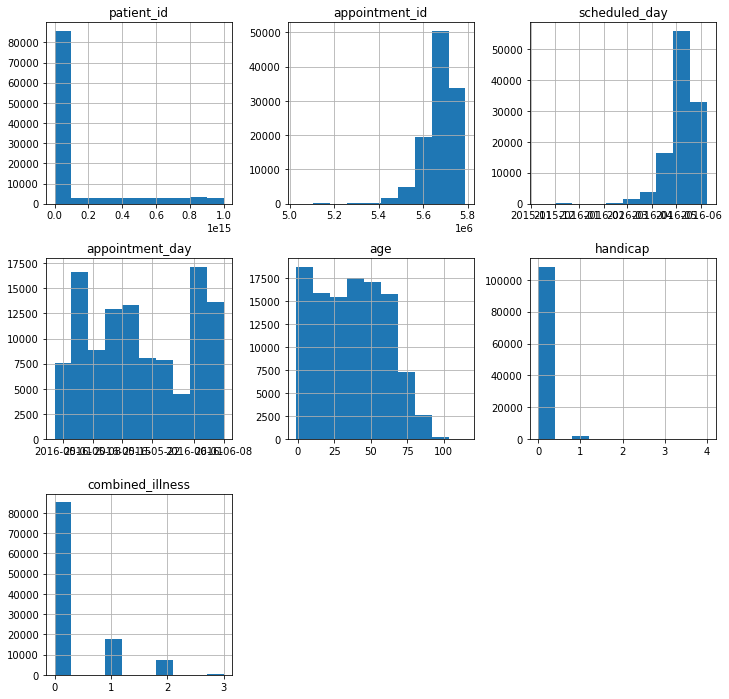

In [82]:
#hist plot for dataframe
df.hist(figsize=(12,12));

Some histogram plots for feature frequency

### **Considering Hospital location**

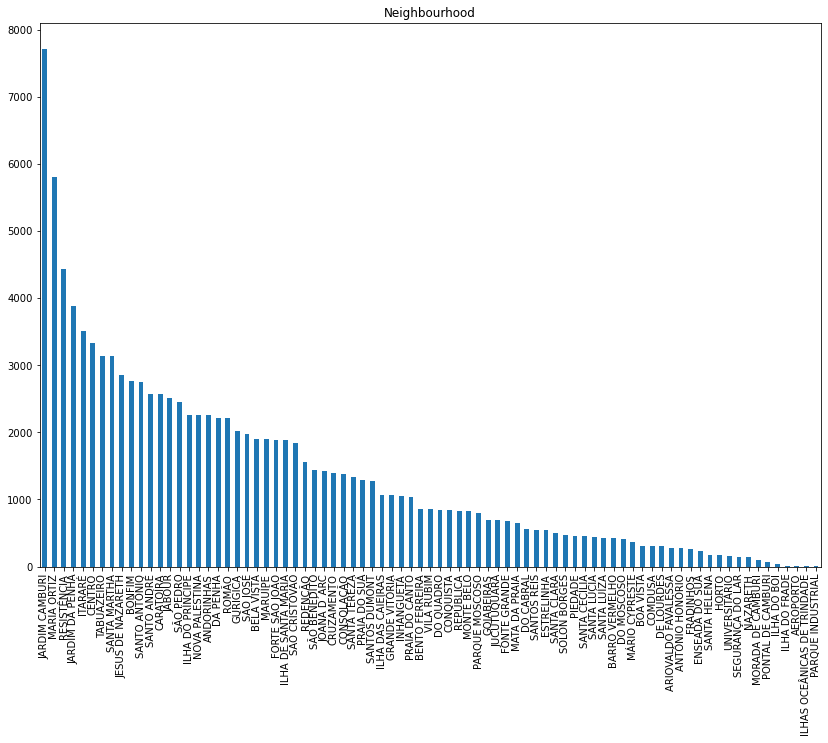

In [57]:
df['neighbourhood'].value_counts().plot(kind='bar',figsize=(14,10),title=('Neighbourhood'));

**We see clearly that there seem to be more patient visiting hospital in JARDIM CAMBURI and least going to PARAQUE INDUSTRIAL
Proposing that there either more people live in those locations or there are services that hosipital in those locations off relative to others, also very likely that the dataset has data from most locations relative to others.**

## **Further exploration**

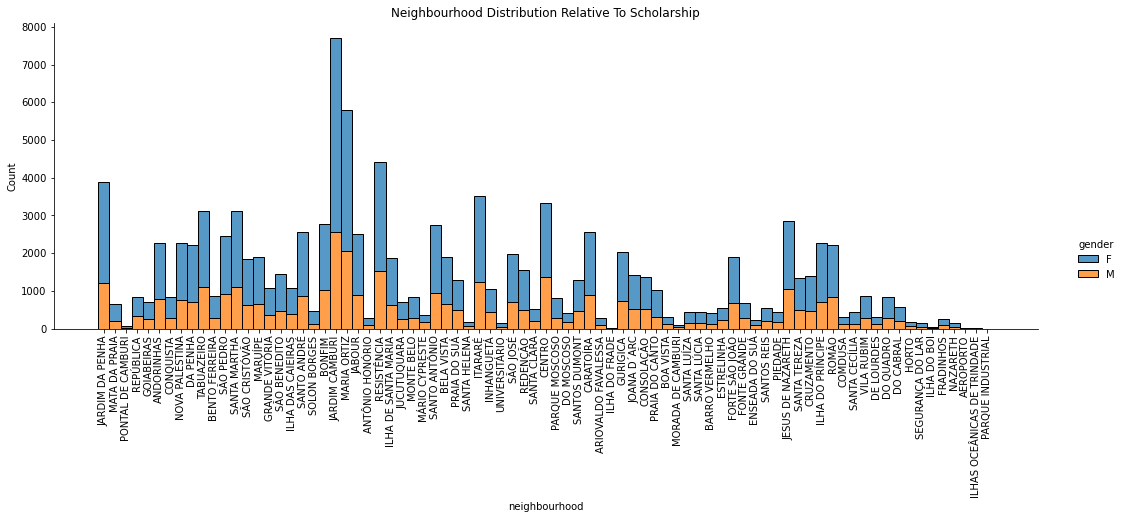

In [84]:
sns.displot(data=df, x="neighbourhood", hue="gender", multiple="stack",height=5, aspect=3)
plt.xticks(rotation=90)
plt.title('Neighbourhood Distribution Relative To Gender');

**we see distribution of gender along hospital locations, we females dominating all the areas**

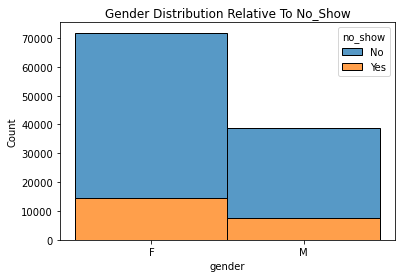

In [68]:
sns.histplot(data=df, x="gender", hue="no_show", multiple="stack")
plt.title('Gender Distribution Relative To No_Show');

**it's known that female are more concerned about of their health than males so the then to show up more to appointments than men, we also noticed there the bais on the plot is mostly population wise as more females either live in the area or use hosipitals in those areas.**

### Exploring neighbourhood consequences to features

In [23]:
# Number of neighbourhood that didn't show up appointments
a=df.query('no_show== "Yes"')['neighbourhood'].count()

In [24]:
#Number of neighbourhood that show up appointments
b=df.query('no_show== "No"')['neighbourhood'].count()

In [25]:
#Finding the proportion of neighbourhood with respect to no_show
c=a+b
neigh_no_show_no_prop= b/c
neigh_no_show_yes_prop=a/c
neigh_no_show_no_prop,neigh_no_show_yes_prop

(0.798067440534892, 0.20193255946510807)

*The shows the total value of show or no_show for appointment based on the total number of patients*

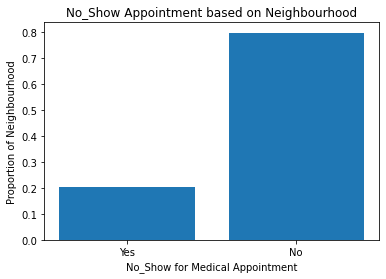

In [26]:
#ploting for the proportions
plt.bar(['Yes','No'],[neigh_no_show_yes_prop,neigh_no_show_no_prop])
plt.title("No_Show Appointment based on Neighbourhood")
plt.xlabel("No_Show for Medical Appointment")
plt.ylabel("Proportion of Neighbourhood");

**This shows that patients are more likely to show up for medical appointments**

### Neighbourhood Comparison

In [27]:
# patients not showing up for appointment and the location with the max values
no_show_yes=df.query('no_show== "Yes"')['neighbourhood'].value_counts()
no_show_yes.idxmax(),no_show_yes.max()

('JARDIM CAMBURI', 1465)

In [28]:
#patients not showing up for appointment and the location with the min values
no_show_yes.idxmin(),no_show_yes.min()

('AEROPORTO', 1)

In [29]:
# patient showing up for appointment and the location with the max values
no_show_no=df.query('no_show== "No"')['neighbourhood'].value_counts()
no_show_no.idxmax(),no_show_no.max()

('JARDIM CAMBURI', 6252)

In [30]:
#patients showing up for appointment and the location with the min values
no_show_no.idxmin(),no_show_no.min()

('PARQUE INDUSTRIAL', 1)

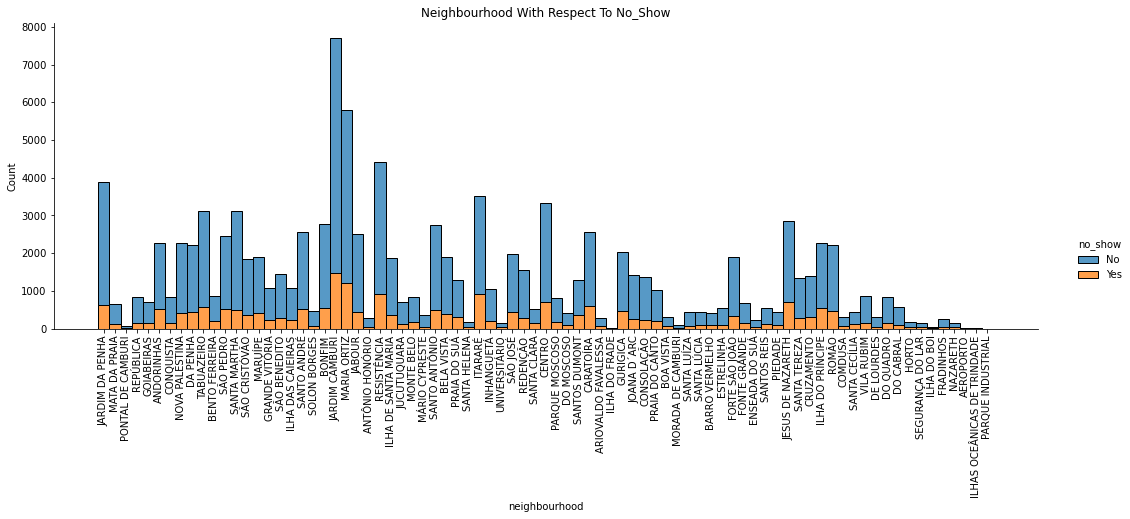

In [58]:
#lot for neighbourhood distributioon wrt no_show
sns.displot(data=df, x="neighbourhood", hue="no_show", multiple="stack",height=5, aspect=3)
plt.xticks(rotation=90)
plt.title('Neighbourhood With Respect To No_Show');

**The above distribution is expected as there the high appointment location in the JAEDIM CAMBURI area, it is seen that the max number of those that did and didn;t show up for their medical appointment is more focussed based the number of patients in that area. Least position fluctuate to PARQUE INDUSTRIAL for patients that show up for appointments and AEROPORTO for patients that don't show up**


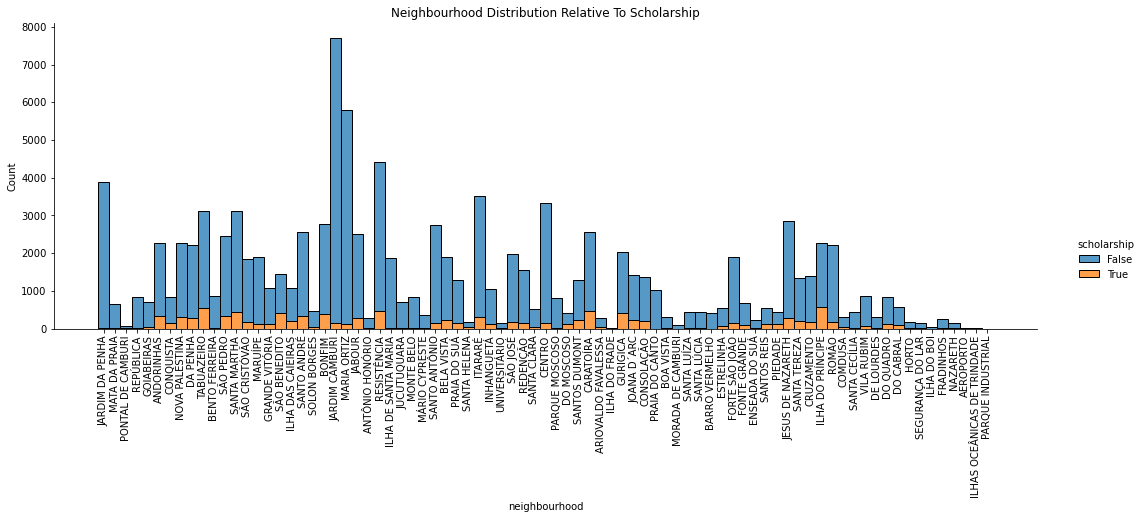

In [83]:
#lot for neighbourhood distributioon wrt scholarship
sns.displot(data=df, x="neighbourhood", hue="scholarship", multiple="stack",height=5, aspect=3)
plt.xticks(rotation=90)
plt.title('Neighbourhood Distribution Relative To Scholarship');

**It is visible that the locations with the most and least amounts of patients showing up for an appointment has no correction with scholarship because not a lot of hosipal locations have patients on scholarship**

### Considering Age 

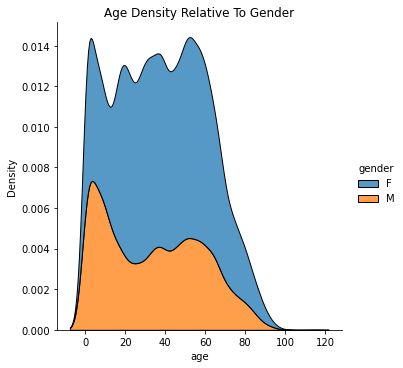

In [67]:
#density plot for age wrt gender
sns.displot(data=df, x="age", hue="gender", multiple="stack", kind="kde")
plt.title('Age Density Relative To Gender');

**We see more male and female patients within the ages of 0-6**

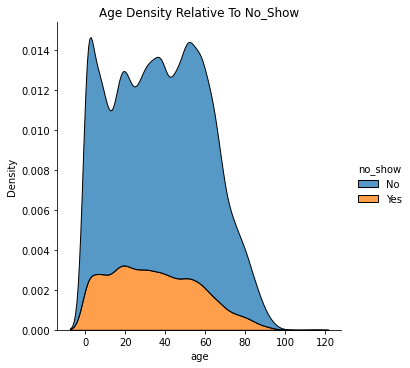

In [65]:
#density plot for age wrt no_show
sns.displot(data=df, x="age", hue="no_show", multiple="stack", kind="kde")
plt.title('Age Density Relative To No_Show');

In [87]:
#min and max ages in dataset
df['age'].min(),df['age'].max()

(-1, 115)

**It is visible that most age brackets then to show up more for medical appointment, ages 60-115 tend to show up for medical appointments more than they miss; this could be because older patient are mostly retired and have nothing doing so they look forward to appointment and they tend to value their health as well.**

**Age groups in the teens category have a spike in not showing up for medical appointments and it could be a work or related cause**

**With age groups that do show up the most for medical appointment being either appointments for pregnant woman(age= -1) or for babies**


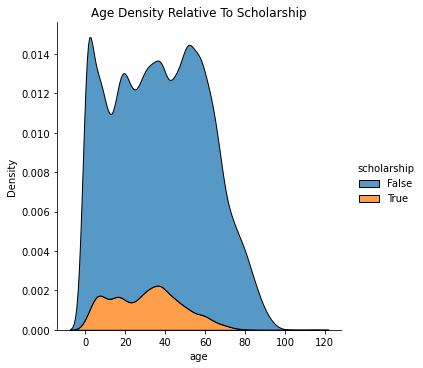

In [88]:
#density plot for age wrt scholarship
sns.displot(data=df, x="age", hue="scholarship", multiple="stack", kind="kde")
plt.title('Age Density Relative To Scholarship');

**we see ages between 25-40 having more scholarships awarded to them than other ages**

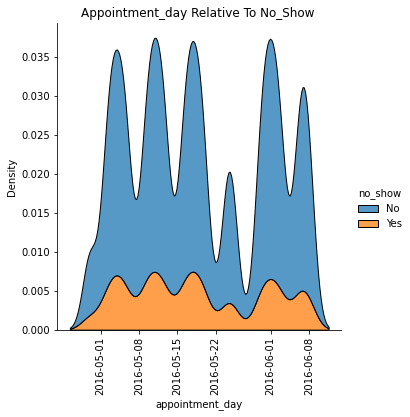

In [70]:
sns.displot(data=df, x="appointment_day", hue="no_show", multiple="stack",kind='kde')
plt.xticks(rotation=90)
plt.title('Appointment_day Relative To No_Show ');

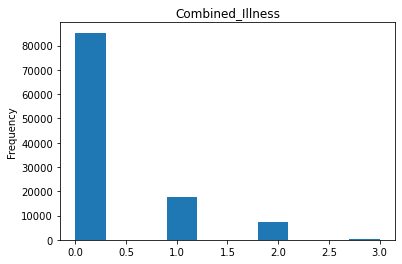

In [61]:
df.combined_illness.plot(kind='hist',title='Combined_Illness');

In [34]:
df.groupby('combined_illness')['no_show'].value_counts()

combined_illness  no_show
0                 No         67474
                  Yes        17838
1                 No         14453
                  Yes         3129
2                 No          6071
                  Yes         1306
3                 No           210
                  Yes           46
Name: no_show, dtype: int64

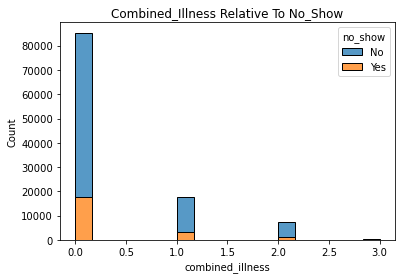

In [62]:
sns.histplot(data=df, x="combined_illness", hue="no_show", multiple="stack")
plt.title('Combined_Illness Relative To No_Show');

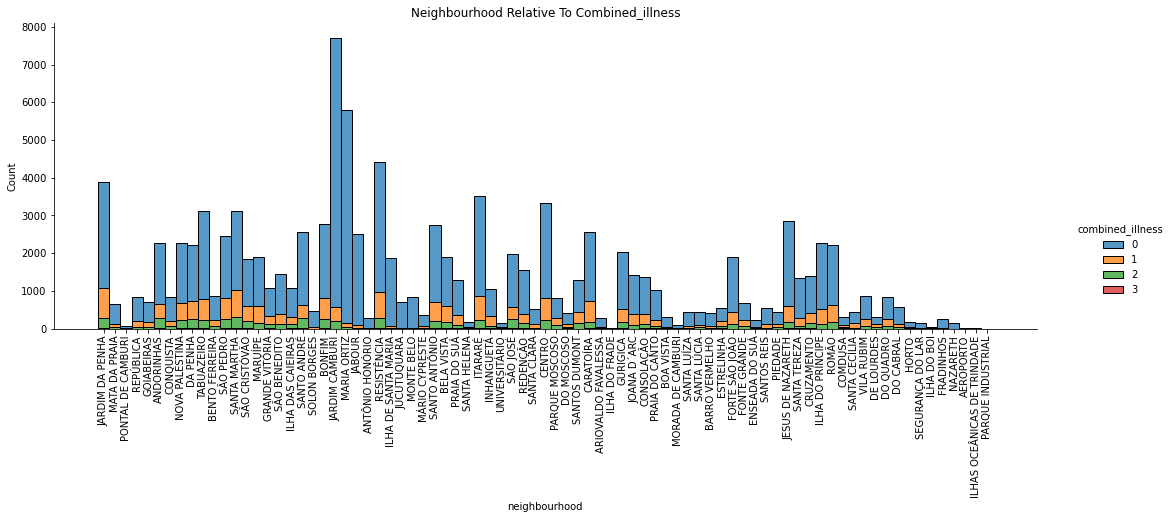

In [63]:
sns.displot(data=df, x="neighbourhood", hue="combined_illness", multiple="stack",height=5, aspect=3,palette='tab10')
plt.xticks(rotation=90)
plt.title('Neighbourhood Relative To Combined_illness');

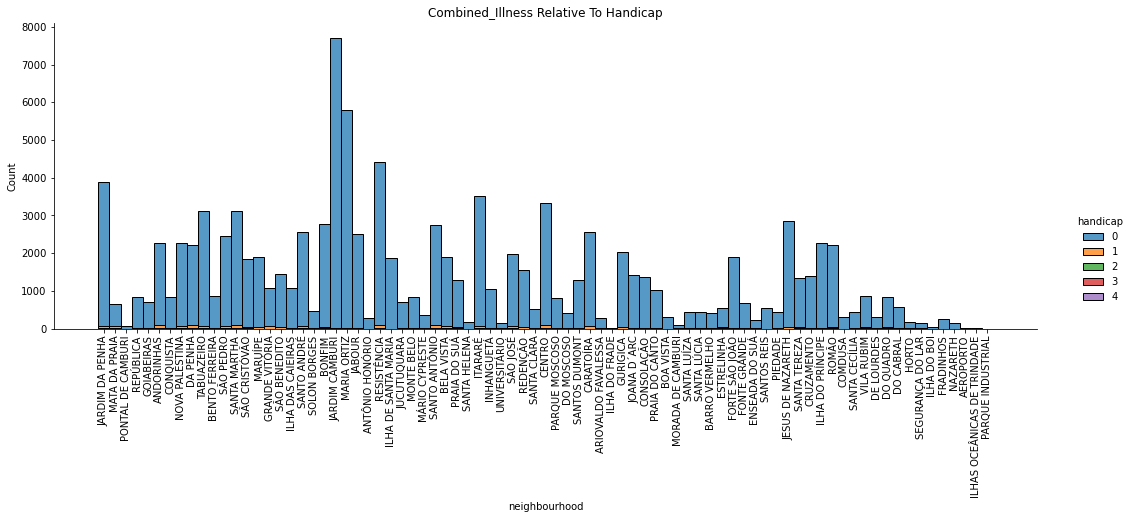

In [64]:
sns.displot(data=df, x="neighbourhood", hue="handicap", multiple="stack",height=5, aspect=3,palette='tab10')
plt.xticks(rotation=90)
plt.title('Combined_Illness Relative To Handicap');

> We can see from the above the distribution of patients with combined illness on the no_show feature, it's shows the number of patient of patients showing up for a medical appointment with increase in the combined_illness. 
>We do notice that patient show up for appointment more irrespective of the illness they suffer from.

In [46]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date,combined_illness
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No,0 days 18:38:08,1


In [47]:
df.query('no_show=="Yes"')['handicap'].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: handicap, dtype: int64

In [48]:
df.query('no_show=="No"')['handicap'].value_counts()

0    86374
1     1676
2      146
3       10
4        2
Name: handicap, dtype: int64

In [49]:
df.query('no_show=="Yes"')['sms_received'].value_counts()

False    12535
True      9784
Name: sms_received, dtype: int64

In [50]:
df.query('no_show=="No"')['sms_received'].value_counts()

False    62510
True     25698
Name: sms_received, dtype: int64

In [51]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date,combined_illness
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No,0 days 18:38:08,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No,0 days 16:08:27,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No,0 days 16:19:04,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,0 days 17:29:31,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No,0 days 16:07:23,2


<AxesSubplot:xlabel='gender,no_show'>

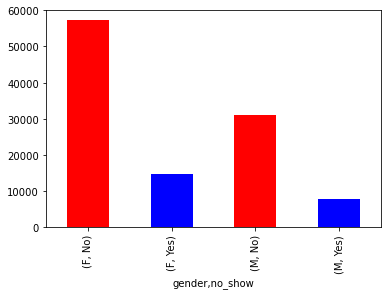

In [52]:
df.groupby('gender').no_show.value_counts().plot(kind='bar',color=('red','blue'))

In [53]:
df.groupby('no_show').age.value_counts()

no_show  age
No       0      2900
         1      1858
         52     1449
         56     1372
         2      1366
                ... 
Yes      95        6
         115       3
         97        2
         96        1
         98        1
Name: age, Length: 204, dtype: int64

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

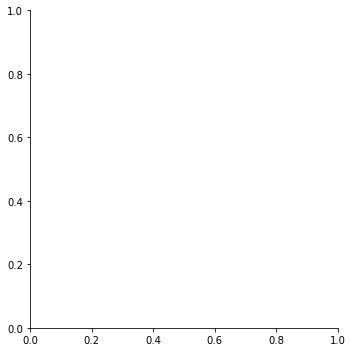

In [54]:
sns.displot(data=df, x="date", hue="no_show", multiple="stack",kind='kde')
plt.xticks(rotation=90);

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


We noticed that on our dataset we have more female to male patients overall.

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!